In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', None)

## ANÁLISIS DE LA CORRELACIÓN ENTRE FACTORES SOCIODEMOGRÁFICOS Y LA DESERCIÓN ESCOLAR EN MÉXICO DURANTE EL CICLO ESCOLAR 2019-2020

***Objetivo:***

Determinar la correlación entre los factores sociodemográficos y el abandono escolar de los estudiantes de México durante el ciclo escolar 2019-2020, mediante la metodología de análisis descriptivo estadístico y modelos de Aprendizaje Máquina, con la finalidad de conocer el perfil sociodemográfico de un alumno que abandonó sus estudios en el ciclo escolar donde comenzó la pandemia


### 1. EXTRACCIÓN

***Fuente de datos:***

La Encuesta para la Medición del Impacto COVID-19 en la Educación (ECOVID-ED) 2020 se llevó a cabo de manera especial con el objetivo de conocer el impacto de la cancelación provisional de clases presenciales en las instituciones educativas del país para evitar los contagios por la pandemia COVID-19 en la experiencia educativa de niños, niñas, adolescentes y jóvenes de 3 a 29 años, tanto en el ciclo escolar 2019- 2020, como en ciclo 2020-2021.

**Diccionarios de datos**

ECOVID-ED 2020 se compone de dos encuestas tmodulo y tvivienda con los siguientes datos

In [3]:
#Diccionario de datos tmodulo
ecovid_ed_dic = pd.read_csv('conjunto_de_datos_ecovid_ed_2020_csv/conjunto_de_datos_tmodulo_ecovid_ed_2020/diccionario_de_datos/diccionario_datos_tmodulo_ecovid_ed_2020.csv')
ecovid_ed_dic.head(75)

,nombre_campo,longitud,tipo,nemónico,catálogo,rango_claves
0,Entidad,2,C,ent,ent,01…32
1,Número de control,9,C,con,NaN,01E10011…32E18098
2,Número de renglón,2,C,n_ren,NaN,01…30
3,Pregunta PAREN ¿Qué es usted de (NOMBRE)?,1,C,paren,paren,1...8
4,Pregunta SEXO ¿(NOMBRE) es?,1,C,sexo,sexo,"1,2"
5,Pregunta EDAD ¿Cuántos años cumplidos tiene (NOMBRE)?,2,C,edad,edad,00…99
6,Pregunta NIV ¿(NOMBRE) hasta qué año aprobó en la escuela?,1,C,niv,niv,0…9
7,Pregunta GRA ¿(NOMBRE) hasta qué grado aprobó en la escuela?,2,C,gra,NaN,00…09
8,Pregunta P3.5 ¿(NOMBRE) estuvo inscrito(a) en el pasado año escolar 2019-2020?,1,C,p3_5,p3_5,"1,2"
9,Pregunta P3.6 ¿La escuela donde (NOMBRE) estudió el pasado año escolar fue?,1,C,p3_6,p3_6,"1,2"


In [4]:
#Dicionario de datos tvivienda
ecovid_ed_dic = pd.read_csv('conjunto_de_datos_ecovid_ed_2020_csv/conjunto_de_datos_tvivienda_ecovid_ed_2020/diccionario_de_datos/diccionario_datos_tvivienda_ecovid_ed_2020.csv')
ecovid_ed_dic.head(72)

,nombre_campo,longitud,tipo,nemónico,catálogo,rango_claves
0,Entidad,2,C,ent,ent,01…32
1,Número de control,9,C,con,NaN,01E10011…32E18098
2,Pregunta TOT.PER ¿Cuántas personas viven normalmente en su vivienda contando a los niños pequeños y los ancianos?,2,C,tot_per,tot_per,"01…30,99"
3,"Pregunta TOT.HOM Del total de personas en su vivienda, ¿cuántas son hombres?",2,C,tot_hom,tot_hom,00…30
4,Pregunta P1.3.H1 ¿Cuántos años tiene?,2,C,p1_3_h1,p1_3_h1,00…99
5,Pregunta P1.3.H2 ¿Cuántos años tiene?,2,C,p1_3_h2,p1_3_h2,00…99
6,Pregunta P1.3.H3 ¿Cuántos años tiene?,2,C,p1_3_h3,p1_3_h3,00…99
7,Pregunta P1.3.H4 ¿Cuántos años tiene?,2,C,p1_3_h4,p1_3_h4,00…99
8,Pregunta P1.3.H5 ¿Cuántos años tiene?,2,C,p1_3_h5,p1_3_h5,00…99
9,Pregunta P1.3.H6 ¿Cuántos años tiene?,2,C,p1_3_h6,p1_3_h6,00…99


In [5]:
# Cargado de datast de tmodulo
tmodulo_df = pd.read_csv('conjunto_de_datos_ecovid_ed_2020_csv/conjunto_de_datos_tmodulo_ecovid_ed_2020/conjunto_de_datos/conjunto_de_datos_tmodulo_ecovid_ed_2020.csv')
tmodulo_df

,ENT,CON,N_REN,PAREN,SEXO,EDAD,NIV,GRA,P3_5,P3_6,...,P3_22,P3_23,P3_24,P3_25_1,P3_25_2,P3_25_3,P3_25_4,P3_25_5,P3_26,FACTOR
0,1,01E10011,2,1,1,9,2,4,1,1.0,...,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,4,1374
1,1,01E10011,3,6,2,28,3,3,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1374
2,1,01E10028,1,1,1,8,2,2,1,1.0,...,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1,887
3,1,01E10028,2,1,2,17,3,3,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,887
4,1,01E10028,3,1,1,19,3,3,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11075,32,32E18089,1,1,1,5,1,2,1,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1,1716
11076,32,32E18089,2,1,2,5,1,2,1,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1,1716
11077,32,32E18089,3,1,2,11,2,5,1,1.0,...,6.0,2.0,NaN,0.0,1.0,0.0,0.0,0.0,1,1716
11078,32,32E18098,1,5,1,22,7,2,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1154


In [6]:
# Cargado de dataset de tvivienda
tvivienda_df = pd.read_csv('conjunto_de_datos_ecovid_ed_2020_csv/conjunto_de_datos_tvivienda_ecovid_ed_2020/conjunto_de_datos/conjunto_de_datos_tvivienda_ecovid_ed_2020.csv')
tvivienda_df

,ENT,CON,TOT_PER,TOT_HOM,P1_3_H1,P1_3_H2,P1_3_H3,P1_3_H4,P1_3_H5,P1_3_H6,...,P4_3_1,P4_3_2,P4_3_3,P4_3_4,P4_3_5,P4_3_6,P4_3_7,P4_3_8,P4_3_9,FACTOR
0,1,01E10011,4,3,2.0,9.0,32.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1374
1,1,01E10028,6,3,8.0,19.0,43.0,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,887
2,1,01E10030,3,1,60.0,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1450
3,1,01E10080,6,2,14.0,46.0,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,941
4,1,01E10098,5,2,9.0,30.0,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,32,32E18031,5,3,18.0,13.0,40.0,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1659
5468,32,32E18040,4,3,12.0,36.0,8.0,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2403
5469,32,32E18046,1,1,32.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3857
5470,32,32E18089,6,2,45.0,5.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1716


In [7]:
#Generamos un dataset que combine tmodulo y tvivienda uniéndolos a través de la columna CONm la cual es un identificador de control
tmodulo_df = tmodulo_df.merge(tvivienda_df, on='CON')

### Análisis descriptivo

In [8]:
#Un vistazo a los datos
tmodulo_df.head()

,ENT_x,CON,N_REN,PAREN,SEXO,EDAD,NIV,GRA,P3_5,P3_6,...,P4_3_1,P4_3_2,P4_3_3,P4_3_4,P4_3_5,P4_3_6,P4_3_7,P4_3_8,P4_3_9,FACTOR_y
0,1,01E10011,2,1,1,9,2,4,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1374
1,1,01E10011,3,6,2,28,3,3,2,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1374
2,1,01E10028,1,1,1,8,2,2,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,887
3,1,01E10028,2,1,2,17,3,3,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,887
4,1,01E10028,3,1,1,19,3,3,2,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,887


In [9]:
#tipos de datos
tmodulo_df.dtypes

ENT_x         int64
CON          object
N_REN         int64
PAREN         int64
SEXO          int64
EDAD          int64
NIV           int64
GRA           int64
P3_5          int64
P3_6        float64
P3_7        float64
P3_8        float64
P3_9_1      float64
P3_9_2      float64
P3_9_3      float64
P3_9_4      float64
P3_9_5      float64
P3_9_6      float64
P3_9_7      float64
P3_9_8      float64
P3_9_9      float64
P3_10       float64
P3_11       float64
P3_12_1     float64
P3_12_2     float64
P3_12_3     float64
P3_12_4     float64
P3_12_5     float64
P3_12_6     float64
P3_12_7     float64
P3_12_8     float64
P3_12A      float64
P3_13       float64
P3_14         int64
P3_15       float64
P3_16       float64
P3_17_1     float64
P3_17_2     float64
P3_17_3     float64
P3_17_4     float64
P3_17_5     float64
P3_17_6     float64
P3_17_7     float64
P3_17_8     float64
P3_18       float64
P3_19_1     float64
P3_19_2     float64
P3_19_3     float64
P3_19_4     float64
P3_19_5     float64


Los datos correspondientes a las respuestas de las preguntas ya se encuentran codificados a valores numéricos. Esto facilitará el análisis de correlación

***La variable a predecir*** se encuentra en la columna P3_7 que se refiere a la pregunta:

Pregunta P3.7 ¿(NOMBRE) concluyó el pasado año escolar (2019/2020)?


In [10]:
#Verificación de nulos o vacíos en la variable a predecir
tmodulo_df['P3_7'].isnull().sum()

4044

In [11]:
# Removemos los valores nulos que se refieren a la variable a predecir
tmodulo_df_cleaned = tmodulo_df.copy()
tmodulo_df_cleaned = tmodulo_df_cleaned[tmodulo_df_cleaned.P3_7 > 0.0]
tmodulo_df_cleaned['P3_7'].isnull().sum()

0

1.0    6882
2.0     154
Name: P3_7, dtype: int64

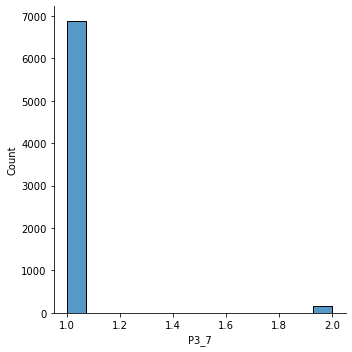

In [12]:
#Verificamos la distribución de la variable a predecir
sns.displot(data=tmodulo_df_cleaned, x="P3_7")
tmodulo_df_cleaned['P3_7'].value_counts()

El valor de 1 se refiere a que no abandonó sus estudios, el valor de 2 que sí

La distribución de deserción se encuentra sesgada puesto que la mayoría de los alumnos no abandonaron sus estudios, quizás sea necesario unsubmuestreo para determinar con más exactitud los factores sociodemográficos que determinan la deserción escolar.

**Distribución de los datos**

Revisando los diccionarios de datos, descubrimos que NIV se refiere a nivel educativo y GRA se refiere al grado del nivel educativo. Es posible combinarlos en una columna que se refiera a NIV-GRAD.

Distribución de niveles educativos:

* "0","Ninguno"
* "1","Preescolar"
* "2","Primaria"
* "3","Secundaria"
* "4","Carrera técnica con secundaria terminada"
* "5","Preparatoria o bachillerato"
* "6","Carrera técnica con preparatoria terminada"
* "7","Licenciatura o profesional"
* "8","Maestría"
* "9","Doctorado"



In [13]:
tmodulo_df_cleaned['niv-gra'] = tmodulo_df_cleaned['NIV']*10 + tmodulo_df_cleaned['GRA']
tmodulo_df_cleaned[['niv-gra','NIV', 'GRA']].drop_duplicates().sort_values(by='niv-gra')

,niv-gra,NIV,GRA
87,0,0,0
154,11,1,1
7,12,1,2
11,13,1,3
33,21,2,1
2,22,2,2
12,23,2,3
0,24,2,4
41,25,2,5
74,26,2,6


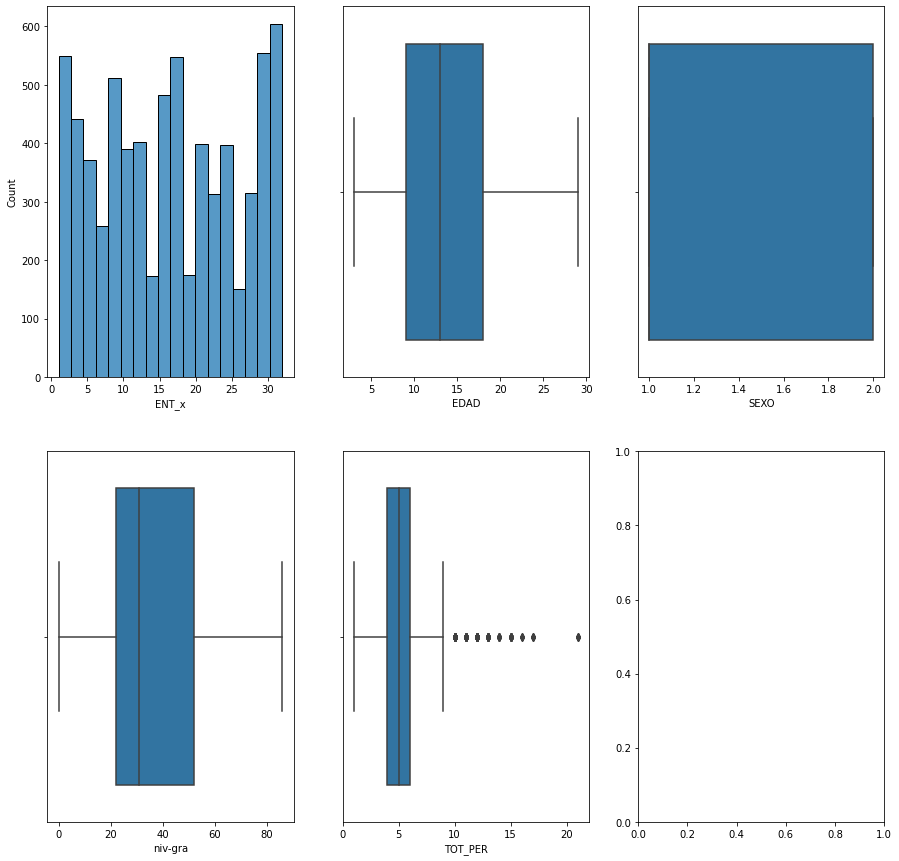

In [14]:
columns_for_checking_dist = ['ENT_x','EDAD', 'SEXO', 'niv-gra', 'TOT_PER']
n_cols = 3
fig, axes = plt.subplots(nrows=2, ncols=n_cols, figsize=(15,15))
for i, column in enumerate(columns_for_checking_dist):
    if column == 'ENT_x':
        sns.histplot(x= tmodulo_df_cleaned[column], ax=axes[i//n_cols,i%n_cols])
    else:
        sns.boxplot(x= tmodulo_df_cleaned[column], ax=axes[i//n_cols,i%n_cols])

La encuesta tiene un sesgo a la izquierda respecto al número de personas que habitan en el hogar, y en el nivel educativo pareciera ser una distribución un poco sesgada a la izquierda. La edad y el sexo parece que si siguen una distribución normal

**Distribución de datos para el caso en que SI hubo deserción**

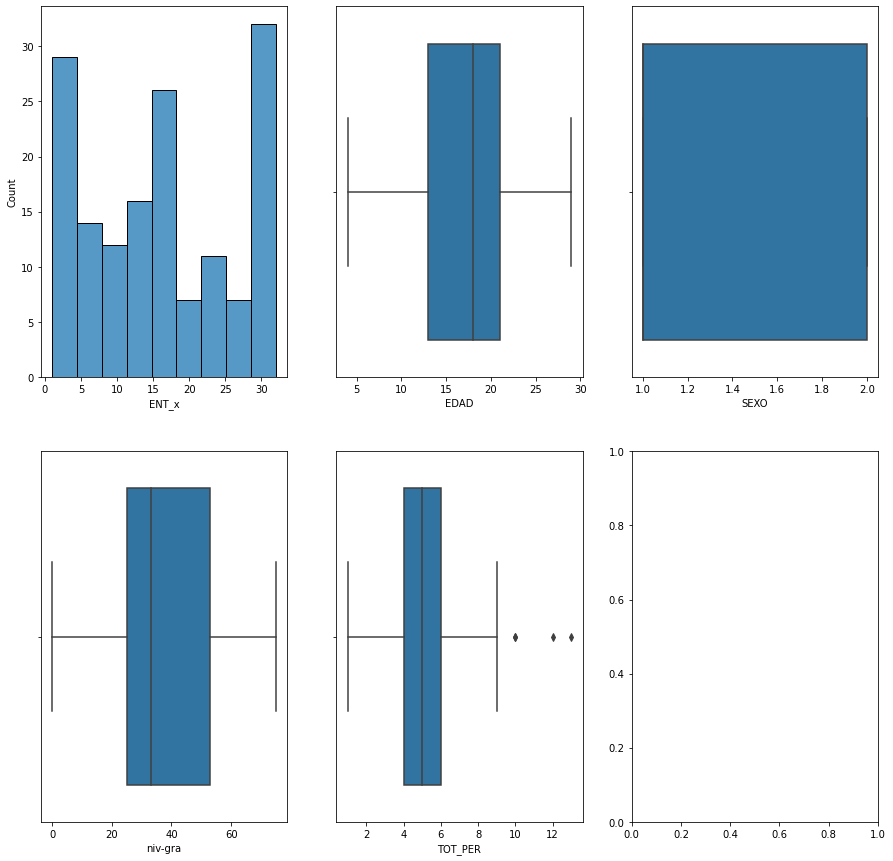

In [15]:
columns_for_checking_dist = ['ENT_x','EDAD', 'SEXO', 'niv-gra', 'TOT_PER']
n_cols = 3
fig, axes = plt.subplots(nrows=2, ncols=n_cols, figsize=(15,15))
tmodulo_df_dropout = tmodulo_df_cleaned[tmodulo_df_cleaned.P3_7 == 2]

for i, column in enumerate(columns_for_checking_dist):
    if column == 'ENT_x':
        sns.histplot(x= tmodulo_df_dropout[column], ax=axes[i//n_cols,i%n_cols])
    else:
        sns.boxplot(x= tmodulo_df_dropout[column], ax=axes[i//n_cols,i%n_cols])


### Selección de variables


In [16]:
tmodulo_df_cleaned.dtypes

ENT_x         int64
CON          object
N_REN         int64
PAREN         int64
SEXO          int64
EDAD          int64
NIV           int64
GRA           int64
P3_5          int64
P3_6        float64
P3_7        float64
P3_8        float64
P3_9_1      float64
P3_9_2      float64
P3_9_3      float64
P3_9_4      float64
P3_9_5      float64
P3_9_6      float64
P3_9_7      float64
P3_9_8      float64
P3_9_9      float64
P3_10       float64
P3_11       float64
P3_12_1     float64
P3_12_2     float64
P3_12_3     float64
P3_12_4     float64
P3_12_5     float64
P3_12_6     float64
P3_12_7     float64
P3_12_8     float64
P3_12A      float64
P3_13       float64
P3_14         int64
P3_15       float64
P3_16       float64
P3_17_1     float64
P3_17_2     float64
P3_17_3     float64
P3_17_4     float64
P3_17_5     float64
P3_17_6     float64
P3_17_7     float64
P3_17_8     float64
P3_18       float64
P3_19_1     float64
P3_19_2     float64
P3_19_3     float64
P3_19_4     float64
P3_19_5     float64


Primeras variables a remover: 

variables de control
* CON
* N_REN
* FACTOR_x

variables repetidas
* ENT_y
* Factor_y

Removemos NIV y GRAD también, ya que niv-grad los contiene


In [17]:
tmodulo_df_fe = tmodulo_df_cleaned.drop(['CON', 'N_REN', 'FACTOR_x', 'ENT_y', 'FACTOR_y', 'NIV', 'GRA'], axis=1)
tmodulo_df_fe.head()

,ENT_x,PAREN,SEXO,EDAD,P3_5,P3_6,P3_7,P3_8,P3_9_1,P3_9_2,...,P4_3_1,P4_3_2,P4_3_3,P4_3_4,P4_3_5,P4_3_6,P4_3_7,P4_3_8,P4_3_9,niv-gra
0,1,1,1,9,1,1.0,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24
2,1,1,1,8,1,1.0,1.0,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22
3,1,1,2,17,1,1.0,1.0,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33
6,1,1,2,22,1,2.0,1.0,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41
7,1,5,2,6,1,1.0,1.0,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12


Removemos preguntas que evidentemente por contexto se relacionan con otras o son derivadas de otras

In [18]:
tmodulo_df_fe  = tmodulo_df_fe.drop(['P3_8'], axis = 1)
tmodulo_df_fe.reset_index(inplace=True)
tmodulo_df_fe

,index,ENT_x,PAREN,SEXO,EDAD,P3_5,P3_6,P3_7,P3_9_1,P3_9_2,...,P4_3_1,P4_3_2,P4_3_3,P4_3_4,P4_3_5,P4_3_6,P4_3_7,P4_3_8,P4_3_9,niv-gra
0,0,1,1,1,9,1,1.0,1.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24
1,2,1,1,1,8,1,1.0,1.0,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22
2,3,1,1,2,17,1,1.0,1.0,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33
3,6,1,1,2,22,1,2.0,1.0,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41
4,7,1,5,2,6,1,1.0,1.0,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7031,11075,32,1,1,5,1,1.0,1.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12
7032,11076,32,1,2,5,1,1.0,1.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12
7033,11077,32,1,2,11,1,1.0,1.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25
7034,11078,32,5,1,22,1,1.0,2.0,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72


**Convertir variables a one hot encoding**

In [20]:
from sklearn.preprocessing import OneHotEncoder


In [30]:
tmodulo_df_oh = tmodulo_df_fe.drop(['index','P3_7','EDAD'], axis = 1)
encoder = OneHotEncoder(drop='first')
feature_matrix = encoder.fit_transform(tmodulo_df_oh)

encoder.get_feature_names(tmodulo_df_oh.columns)
tmodulo_df_new = pd.DataFrame(feature_matrix.toarray(),columns = encoder.get_feature_names(tmodulo_df_oh.columns))
tmodulo_df_new['EDAD'] = tmodulo_df_fe['EDAD']
tmodulo_df_new['result'] = tmodulo_df_fe['P3_7']
for column in tmodulo_df_new.columns:
    if 'nan' in column:
        tmodulo_df_new.drop([column], axis=1, inplace=True)

tmodulo_df_new.dtypes[:90]


ENT_x_2        float64
ENT_x_3        float64
ENT_x_4        float64
ENT_x_5        float64
ENT_x_6        float64
ENT_x_7        float64
ENT_x_8        float64
ENT_x_9        float64
ENT_x_10       float64
ENT_x_11       float64
ENT_x_12       float64
ENT_x_13       float64
ENT_x_14       float64
ENT_x_15       float64
ENT_x_16       float64
ENT_x_17       float64
ENT_x_18       float64
ENT_x_19       float64
ENT_x_20       float64
ENT_x_21       float64
ENT_x_22       float64
ENT_x_23       float64
ENT_x_24       float64
ENT_x_25       float64
ENT_x_26       float64
ENT_x_27       float64
ENT_x_28       float64
ENT_x_29       float64
ENT_x_30       float64
ENT_x_31       float64
ENT_x_32       float64
PAREN_2        float64
PAREN_3        float64
PAREN_4        float64
PAREN_5        float64
PAREN_6        float64
PAREN_7        float64
PAREN_8        float64
SEXO_2         float64
P3_6_2.0       float64
P3_9_1_2.0     float64
P3_9_2_2.0     float64
P3_9_3_2.0     float64
P3_9_4_2.0 

#### Métodos embebidos

Algunos algoritmos de aprendizaje máquina poseen la capacidad de determinar el nivel de importancia de las características (feature_importance) para predecir la variable dependiente. Utilizaremos el algoritmo de RandomForest sobre nuestro dataset para determinar las variables que tengan mayor correlación con la deserción escolar 


Debido a que los datos presentan sesgo hacia observaciones de alumnos que no abandonaron sus estudios, se hará un submuestreo para balancear los datos un poco

In [31]:
tmodulo_df_fe_sub = tmodulo_df_new.copy()
tmodulo_df_fe_sub.rename(columns={'result':'y'}, inplace=True)
tmodulo_df_fe_sub['y'] = tmodulo_df_fe_sub['y'].apply(lambda x: 1 if x == 2.0 else 0)
y_0 = tmodulo_df_fe_sub[tmodulo_df_fe_sub['y']==0]
y_1 = tmodulo_df_fe_sub[tmodulo_df_fe_sub['y']==1]
y_0 = y_0.sample(n=y_1.shape[0], random_state=152, replace=False)
tmodulo_df_fe_sub = pd.concat([y_1, y_0],ignore_index=True)
tmodulo_df_fe_sub = tmodulo_df_fe_sub.sample(frac=1.0).reset_index(drop=True)
tmodulo_df_fe_sub['y'].value_counts()

1    154
0    154
Name: y, dtype: int64

In [32]:
X =  tmodulo_df_fe_sub.loc[:, tmodulo_df_fe_sub.columns != 'y']
y = tmodulo_df_fe_sub['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=.3,
                                                 random_state=984)

**Implementación de Random Forest**

In [40]:
rfc = RandomForestClassifier( random_state=42)
param_grid = { 
    'n_estimators': [200, 500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
model = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring = 'precision')
model.fit(X_train, y_train)
importance = model.best_estimator_.feature_importances_
feature_importanec = pd.DataFrame.from_dict({'variable':X.columns,'importance':importance}).sort_values(by='importance', ascending=False)
feature_importanec[:10]

,variable,importance
60,P3_12_4_1.0,0.069189
42,P3_9_3_2.0,0.051439
40,P3_9_1_2.0,0.046728
74,P3_14_2,0.045029
41,P3_9_2_2.0,0.043330
67,P3_12A_4.0,0.043110
46,P3_9_8_2.0,0.037966
141,P3_25_2_1.0,0.034717
45,P3_9_7_2.0,0.034170
47,P3_9_9_2.0,0.032540


### Resultados
